In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings("ignore")

# Libraries for Clustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Libraries for CART, Random forest and ANN
# 1 - CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# 2 - Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# 3 - ANN
from sklearn.neural_network import MLPClassifier

In [75]:
df = pd.read_csv('bank_marketing_part1_Data.csv')
df2 = df.copy()

In [76]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [77]:
df.shape

(210, 7)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [79]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [80]:
df.duplicated().sum()

0

In [81]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [82]:
def univariateAnalysis(column):    
    
    plt.figure(figsize = (4,3))
    print("Distribution of " + column)
    print("-----------------------------------------------------------------")
    sns.distplot(df[column], kde=True, color='g');
    plt.show()
    
    plt.figure(figsize = (4,3))
    print("BoxPlot of " + column)
    print("------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

Distribution of spending
-----------------------------------------------------------------


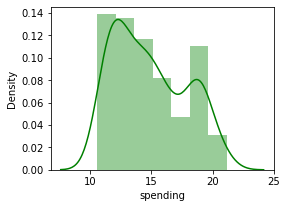

BoxPlot of spending
------------------------------------------------------------------


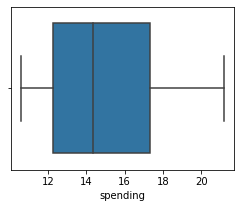

Distribution of advance_payments
-----------------------------------------------------------------


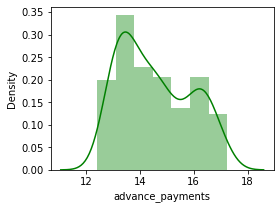

BoxPlot of advance_payments
------------------------------------------------------------------


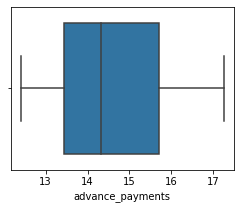

Distribution of probability_of_full_payment
-----------------------------------------------------------------


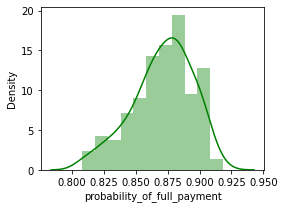

BoxPlot of probability_of_full_payment
------------------------------------------------------------------


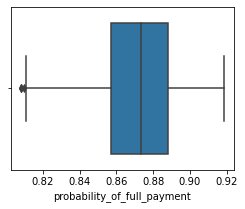

Distribution of current_balance
-----------------------------------------------------------------


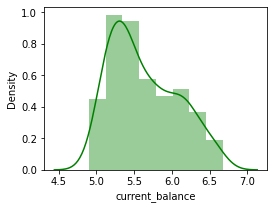

BoxPlot of current_balance
------------------------------------------------------------------


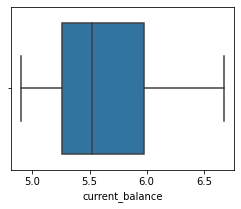

Distribution of credit_limit
-----------------------------------------------------------------


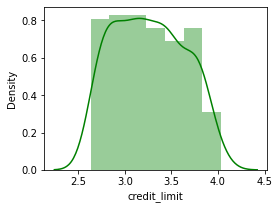

BoxPlot of credit_limit
------------------------------------------------------------------


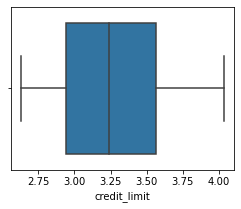

Distribution of min_payment_amt
-----------------------------------------------------------------


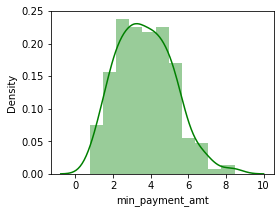

BoxPlot of min_payment_amt
------------------------------------------------------------------


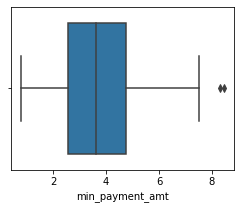

Distribution of max_spent_in_single_shopping
-----------------------------------------------------------------


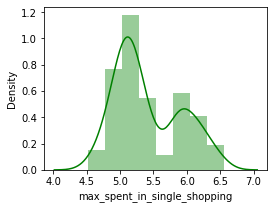

BoxPlot of max_spent_in_single_shopping
------------------------------------------------------------------


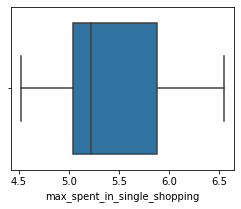

In [83]:
for i in df.columns:
    univariateAnalysis(i)

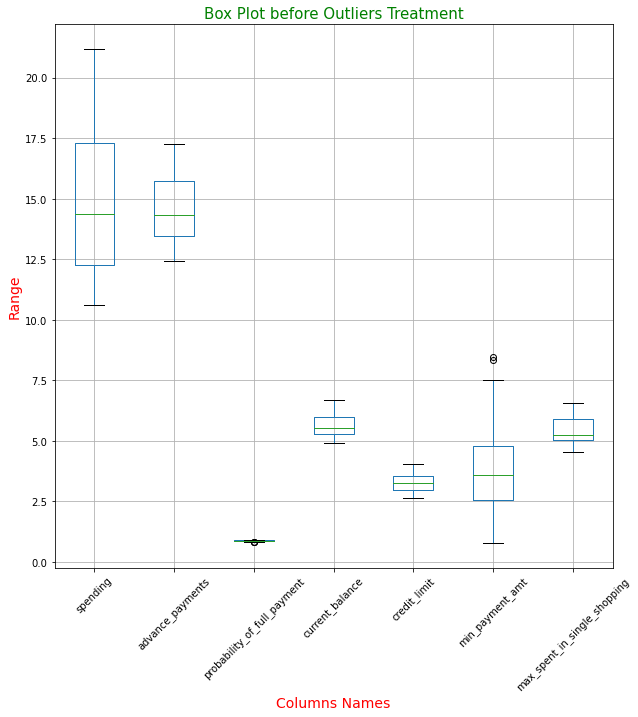

In [84]:
# Checking for outliers

df.boxplot(figsize=(10,10))
plt.xticks(rotation=45)
plt.xlabel('Columns Names',fontsize=14, color = 'red')
plt.ylabel('Range',fontsize=14, color = 'red')
plt.title('Box Plot before Outliers Treatment',fontsize=15, color = 'green')
plt.show()

In [85]:
def detect_outlier(x):   
    Q1,Q3 = x.quantile([0.25,0.75])                  
    IQR = Q3-Q1                  
    LL = Q1 - (1.5 * IQR)                  
    UL = Q3 + (1.5 * IQR)                   
    return LL, UL 

In [86]:
for i in df.columns:
    LL,UL = detect_outlier(df[i])                 
    df[i] = np.where(df[i] > UL, UL, df[i])                 
    df[i] = np.where(df[i] < LL, LL, df[i])

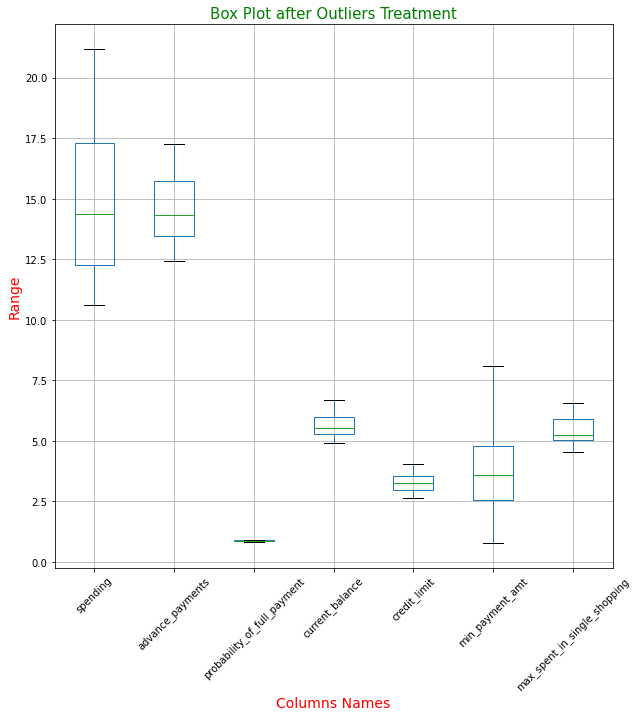

In [87]:
# Box plot - After outliers treatment

df.boxplot(figsize=(10,10))
plt.xticks(rotation=45)
plt.xlabel('Columns Names',fontsize=14, color = 'red')
plt.ylabel('Range',fontsize=14, color = 'red')
plt.title('Box Plot after Outliers Treatment',fontsize=15, color = 'green')
plt.show()

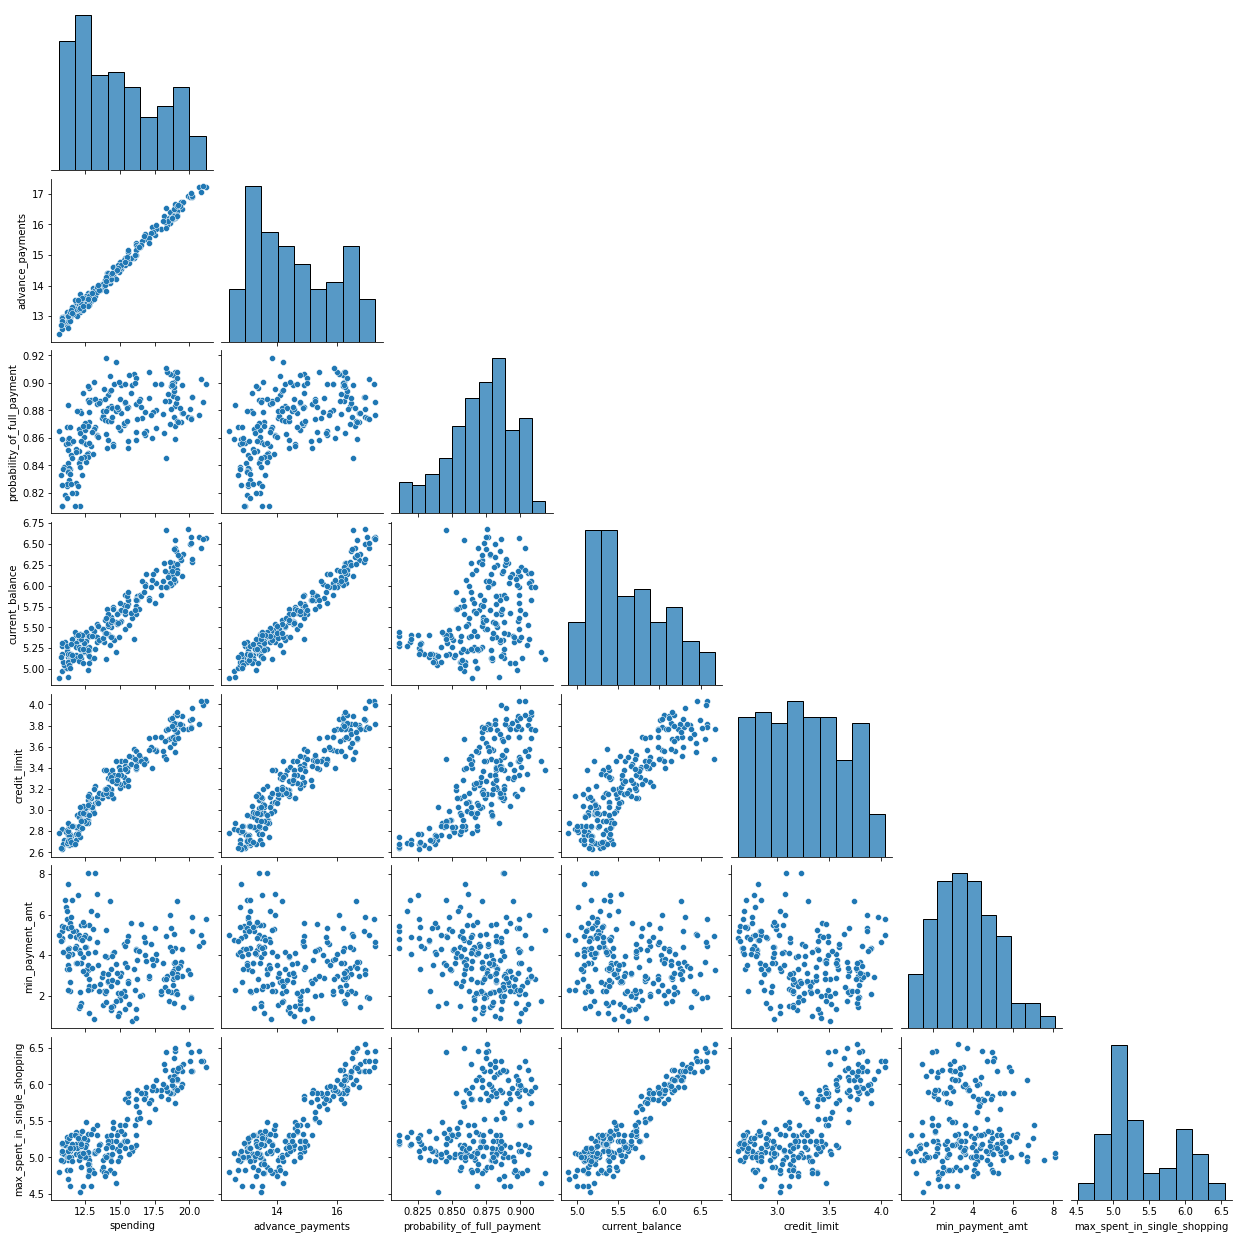

In [88]:
sns.pairplot(df, corner=True);

Text(0.5, 1.0, 'Heat Map')

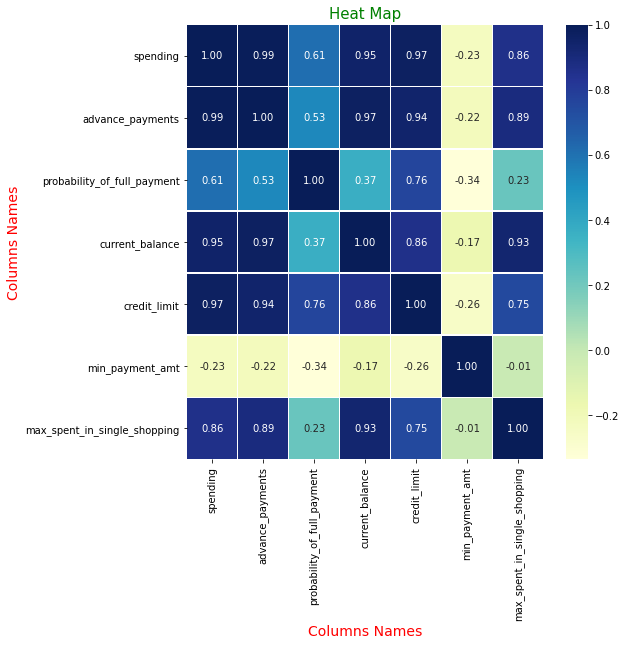

In [89]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap="YlGnBu", linewidths=.5)
plt.xlabel('Columns Names',fontsize=14, color = 'red')
plt.ylabel('Columns Names',fontsize=14, color = 'red')
plt.title('Heat Map',fontsize=15, color = 'green')

In [90]:
sc = StandardScaler()

In [91]:
df_scaled = pd.DataFrame(sc.fit_transform(df), columns = df.columns)

In [92]:
df_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


In [93]:
wardlink = linkage(df_scaled, method = 'ward')

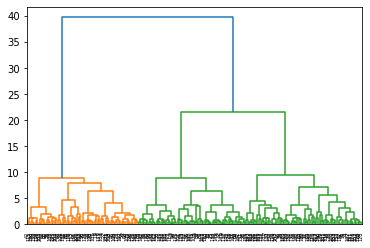

In [94]:
dend = dendrogram(wardlink)

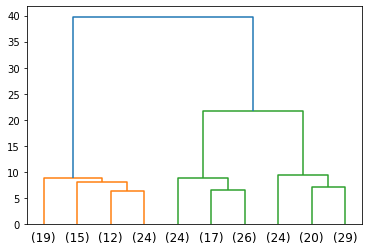

In [95]:
dend1 = dendrogram(wardlink, truncate_mode ='lastp', p = 10)

In [96]:
clusters = fcluster(wardlink, 3, criterion = 'maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [97]:
df['clusters_dend'] = clusters
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_dend
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [98]:
# Dendrogram Cluster profile

df['clusters_dend'].value_counts().sort_index()

1    70
2    67
3    73
Name: clusters_dend, dtype: int64

In [99]:
aggdata_cluster = df.groupby('clusters_dend').mean()
aggdata_cluster ['Freq'] = df['clusters_dend'].value_counts().sort_index()
aggdata_cluster 

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters_dend,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848155,5.238940,2.848537,4.940302,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


In [100]:
wss=[]
for i in range(1,11):
    KM = KMeans(n_clusters=i)                             
    KM.fit(df_scaled)                             
    wss.append(KM.inertia_)

In [101]:
wss

[1469.9999999999998,
 659.1474009548498,
 430.298481751223,
 370.8685962394206,
 327.0583618254692,
 290.00750305055453,
 262.057981659531,
 240.61460659384514,
 222.90735599684695,
 206.11216451010816]

Text(0.5, 1.0, 'Elbow Curve')

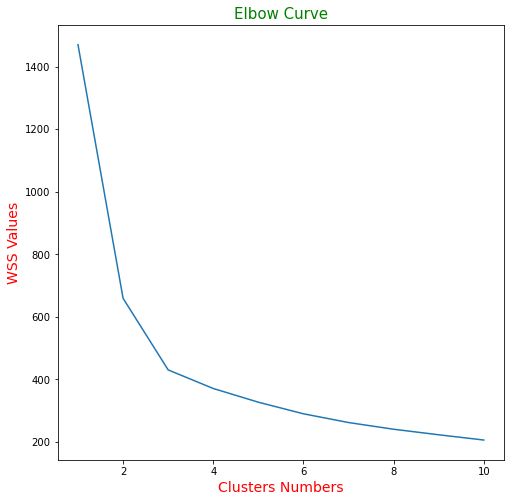

In [102]:
plt.figure(figsize = (8,8))
plt.plot(range(1,11),wss);
plt.xlabel('Clusters Numbers',fontsize=14, color = 'red')
plt.ylabel('WSS Values',fontsize=14, color = 'red')
plt.title('Elbow Curve',fontsize=15, color = 'green')

In [103]:
# Checking of 4 clusters
k_temp = KMeans(n_clusters=4)
k_temp.fit(df_scaled)

KMeans(n_clusters=4)

In [104]:
labels_temp = k_temp.labels_

In [105]:
labels_temp

array([1, 0, 1, 2, 1, 2, 2, 0, 1, 2, 1, 3, 2, 1, 0, 2, 0, 2, 0, 2, 2, 2,
       1, 2, 0, 3, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 3, 1,
       2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 3, 2, 2, 2, 1, 0, 2, 2, 3, 0, 1,
       1, 0, 1, 0, 0, 2, 1, 1, 2, 1, 0, 2, 3, 0, 0, 0, 0, 1, 2, 3, 3, 3,
       3, 2, 0, 1, 0, 2, 0, 1, 1, 3, 2, 3, 0, 1, 3, 1, 0, 1, 1, 2, 0, 1,
       3, 0, 1, 2, 2, 3, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0,
       0, 1, 2, 1, 1, 2, 3, 0, 3, 0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 3,
       0, 0, 0, 2, 0, 1, 1, 2, 1, 3, 1, 2, 3, 0, 0, 2, 0, 2, 0, 1, 1, 1,
       0, 0, 3, 2, 0, 0, 0, 0, 3, 3, 0, 3, 0, 2, 0, 0, 2, 1, 0, 3, 1, 2,
       1, 2, 0, 3, 0, 2, 3, 0, 3, 0, 3, 3])

In [106]:
round(silhouette_score(df_scaled,labels_temp),3)

0.33

In [107]:
round(silhouette_samples(df_scaled,labels_temp).min(),3)

-0.043

In [108]:
# Checking of 3 clusters
k_final = KMeans(n_clusters=3)
k_final.fit(df_scaled)

KMeans(n_clusters=3)

In [109]:
labels = k_final.labels_

In [110]:
labels

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0])

In [111]:
round(silhouette_score(df_scaled,labels),3)

0.401

In [112]:
round(silhouette_samples(df_scaled,labels).min(),3)

0.003

In [113]:
df2['Clust_kmeans'] = labels

In [114]:
df2['Clust_kmeans'].value_counts().sort_index()

0    71
1    72
2    67
Name: Clust_kmeans, dtype: int64

In [115]:
aggdata_kmean = df2.groupby('Clust_kmeans').mean()
aggdata_kmean['Freq'] = df2['Clust_kmeans'].value_counts().sort_index()
aggdata_kmean

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Clust_kmeans,,,,,,,,
0,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,71
1,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,72
2,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,67


In [116]:
# ----------------Question 2--------------------

data = pd.read_csv('insurance_part2_data.csv')

In [117]:
data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [118]:
data.shape

(3000, 10)

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [120]:
data.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [121]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000,NaN,NaN,NaN,38.091,10.4635,8,32,36,42,84
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000,NaN,NaN,NaN,14.5292,25.4815,0,0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000,NaN,NaN,NaN,70.0013,134.053,-1,11,26.5,63,4580
Sales,3000,NaN,NaN,NaN,60.2499,70.734,0,20,33,69,539
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
# I am not removing duplicates heres !!
data.duplicated().sum()

139

In [123]:
data[data.duplicated()]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [124]:
# Continous variable
data_num = data.select_dtypes(['int64','float64'])

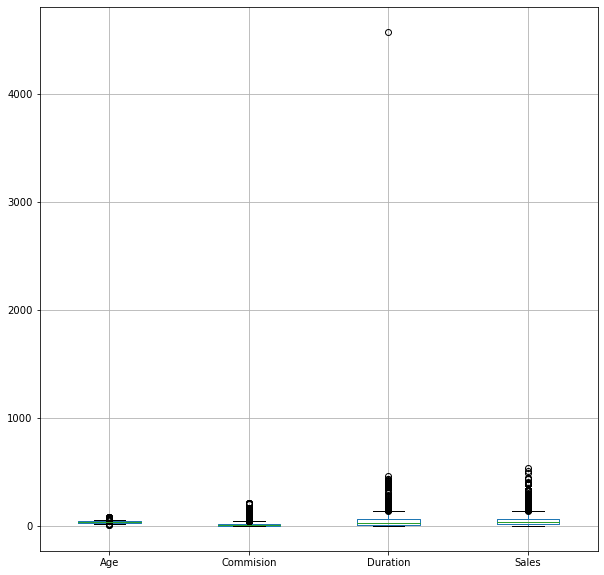

In [125]:
plt.figure(figsize=(10,10))
data_num.boxplot();

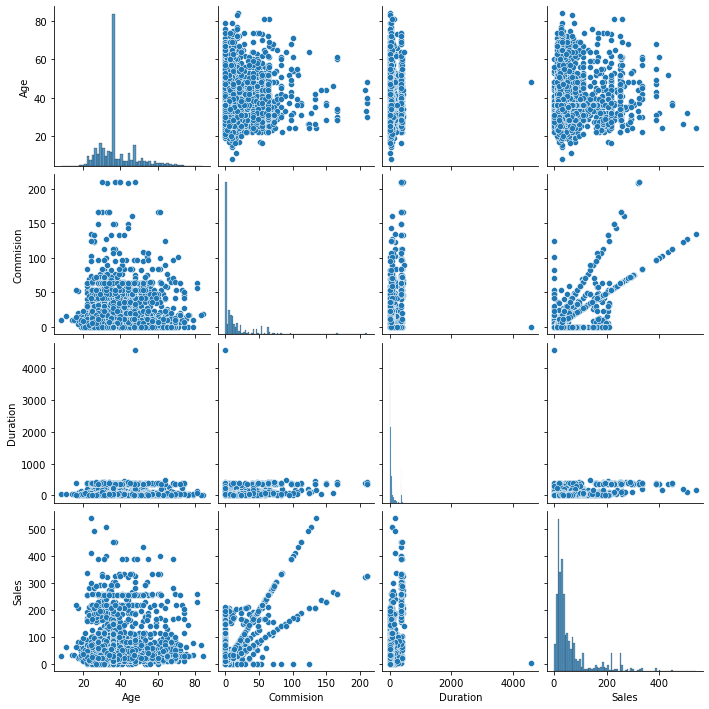

In [126]:
sns.pairplot(data_num);

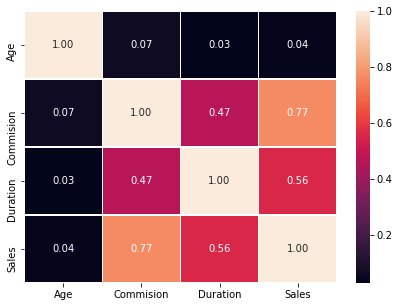

In [127]:
plt.figure(figsize=(7,5))
sns.heatmap(data_num.corr(), annot=True, fmt='.2f', linewidths=.5);

In [128]:
# Categorical variable
data_cat = data.select_dtypes(['object'])
data_cat.columns

Index(['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name',
       'Destination'],
      dtype='object')

In [129]:
for z in data_cat.columns:
    print(data_cat[z].value_counts())
    print('\n*********************************')

EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64

*********************************
Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64

*********************************
No     2076
Yes     924
Name: Claimed, dtype: int64

*********************************
Online     2954
Offline      46
Name: Channel, dtype: int64

*********************************
Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64

*********************************
ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64

*********************************


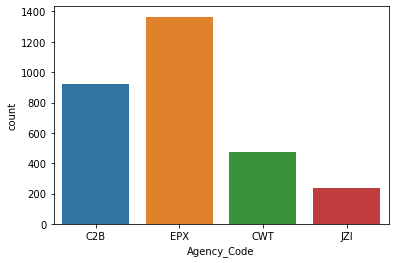

In [130]:
sns.countplot(data_cat['Agency_Code']);

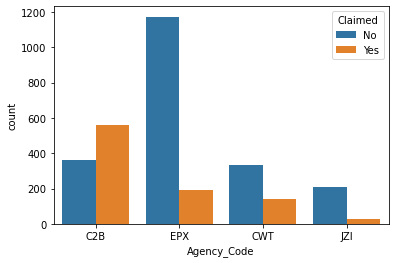

In [131]:
sns.countplot(data_cat['Agency_Code'], hue = data_cat['Claimed']);

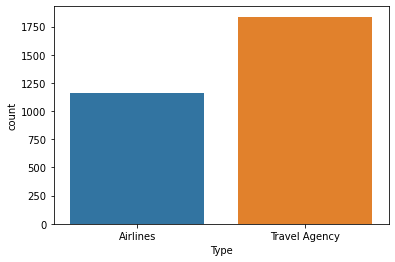

In [132]:
sns.countplot(data_cat['Type']);

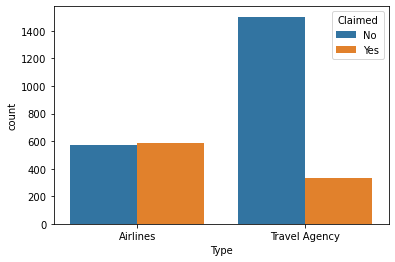

In [133]:
sns.countplot(data_cat['Type'], hue = data_cat['Claimed']);

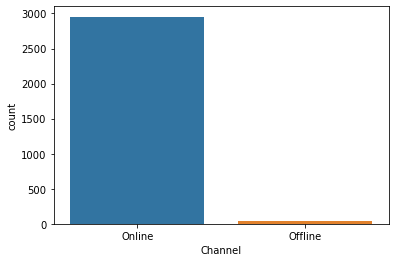

In [134]:
sns.countplot(data_cat['Channel']);

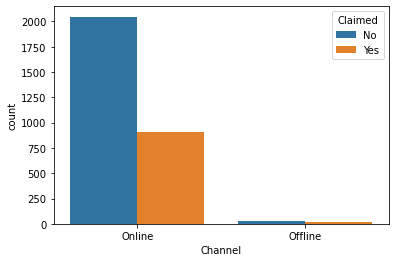

In [135]:
sns.countplot(data_cat['Channel'], hue = data_cat['Claimed']);

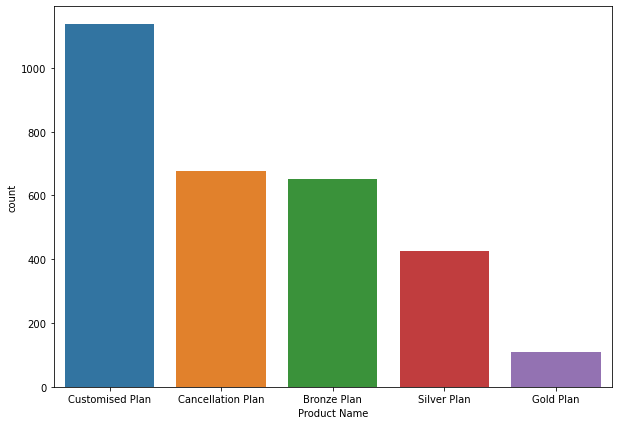

In [136]:
plt.figure(figsize = (10,7))
sns.countplot(data_cat['Product Name']);

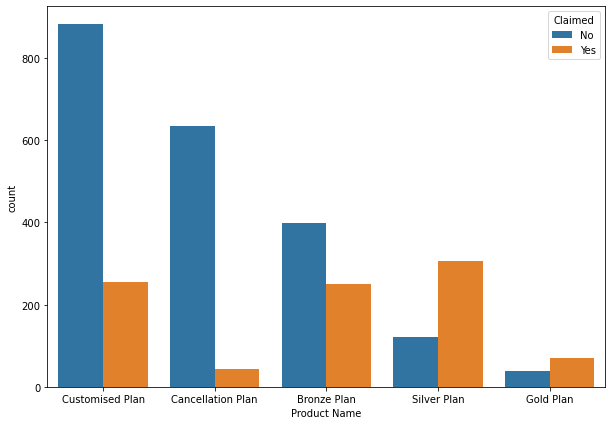

In [137]:
plt.figure(figsize = (10,7))
sns.countplot(data_cat['Product Name'], hue = data_cat['Claimed']);

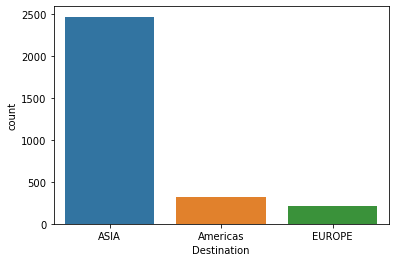

In [138]:
sns.countplot(data_cat['Destination']);

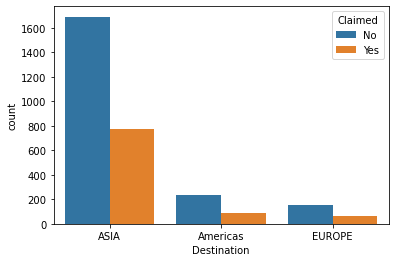

In [139]:
sns.countplot(data_cat['Destination'], hue = data_cat['Claimed']);

In [140]:
for x in data.columns:
    if data[x].dtypes == 'object':                             
       data[x] = pd.Categorical(data[x]).codes     

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [142]:
for x in data[['Agency_Code','Type','Claimed','Channel','Product Name','Destination']]:
    print('Label Encoding for -',x)
    print('-------------------------------\n')
    print(data[x].value_counts().sort_index())
    print('\n')

Label Encoding for - Agency_Code
-------------------------------

0     924
1     472
2    1365
3     239
Name: Agency_Code, dtype: int64


Label Encoding for - Type
-------------------------------

0    1163
1    1837
Name: Type, dtype: int64


Label Encoding for - Claimed
-------------------------------

0    2076
1     924
Name: Claimed, dtype: int64


Label Encoding for - Channel
-------------------------------

0      46
1    2954
Name: Channel, dtype: int64


Label Encoding for - Product Name
-------------------------------

0     650
1     678
2    1136
3     109
4     427
Name: Product Name, dtype: int64


Label Encoding for - Destination
-------------------------------

0    2465
1     320
2     215
Name: Destination, dtype: int64




In [143]:
data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


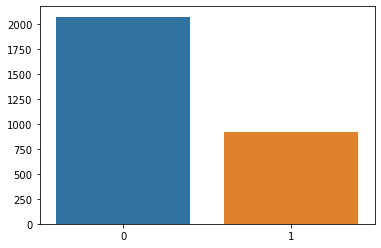

0    0.692
1    0.308
Name: Claimed, dtype: float64


0 is for "No"
1 is for "Yes"


In [144]:
# Target Variable

sns.barplot(data['Claimed'].value_counts().index,data['Claimed'].value_counts().values)
plt.show()
print(data['Claimed'].value_counts(normalize=True))
print('\n')
print('0 is for "No"\n1 is for "Yes"')

In [145]:
x = data.drop('Claimed', axis=1)
y = data.pop('Claimed')

x.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [89]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.30, random_state = 123)

In [90]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (2100, 9)
x_test (900, 9)
y_train (2100,)
y_test (900,)


In [91]:
# -----------------Decision Tree Model---------------------
dtc_temp = DecisionTreeClassifier(criterion = 'gini', random_state = 123)

In [92]:
grid_array_dtc = {'max_depth': [4,5,6],
                  'min_samples_leaf': [10,15,20,25],
                  'min_samples_split': [40,50,60]}

In [93]:
grid_search_dtc = GridSearchCV(estimator = dtc_temp, param_grid = grid_array_dtc, cv = 3)

In [94]:
grid_search_dtc.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'max_depth': [4, 5, 6],
                         'min_samples_leaf': [10, 15, 20, 25],
                         'min_samples_split': [40, 50, 60]})

In [95]:
grid_search_dtc.best_params_

{'max_depth': 4, 'min_samples_leaf': 20, 'min_samples_split': 60}

In [96]:
dtc = grid_search_dtc.best_estimator_
dtc

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, min_samples_split=60,
                       random_state=123)

In [97]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, min_samples_split=60,
                       random_state=123)

In [98]:
prediction_dtc_train = dtc.predict(x_train)
prediction_dtc_test = dtc.predict(x_test)

Accuracy for DecisionTreeClassifier model for train data is: 0.7823809523809524


Classification report for DecisionTreeClassifier model for train data is: 
               precision    recall  f1-score   support

           0       0.82      0.87      0.85      1444
           1       0.67      0.59      0.63       656

    accuracy                           0.78      2100
   macro avg       0.75      0.73      0.74      2100
weighted avg       0.78      0.78      0.78      2100



Confusion Matrix for DecisionTreeClassifier model for train data is:


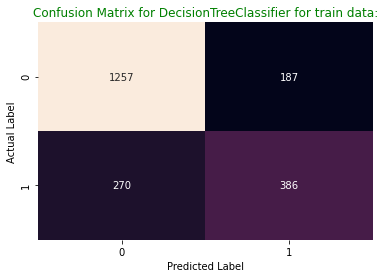

In [99]:
models_names={dtc:'DecisionTreeClassifier'}

print('Accuracy for {} model for train data is:'.format(models_names[dtc]),dtc.score(x_train,y_train))
print('\n')
print('Classification report for {} model for train data is:'.format(models_names[dtc]),'\n',classification_report(y_train,prediction_dtc_train))
print('\n')
print('Confusion Matrix for {} model for train data is:'.format(models_names[dtc]))
sns.heatmap(confusion_matrix(y_train,prediction_dtc_train),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {} for train data:'.format(models_names[dtc]), color = 'green')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Accuracy for DecisionTreeClassifier model for test data is: 0.7977777777777778


Classification report for DecisionTreeClassifier model for test data is: 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       632
           1       0.68      0.62      0.64       268

    accuracy                           0.80       900
   macro avg       0.76      0.75      0.75       900
weighted avg       0.79      0.80      0.79       900



Confusion Matrix for DecisionTreeClassifier model for test data is:


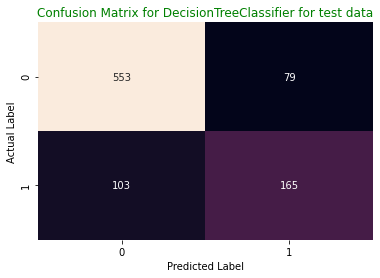

In [100]:
models_names={dtc:'DecisionTreeClassifier'}

print('Accuracy for {} model for test data is:'.format(models_names[dtc]),dtc.score(x_test,y_test))
print('\n')
print('Classification report for {} model for test data is:'.format(models_names[dtc]),'\n',classification_report(y_test,prediction_dtc_test))
print('\n')
print('Confusion Matrix for {} model for test data is:'.format(models_names[dtc]))
sns.heatmap(confusion_matrix(y_test,prediction_dtc_test),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {} for test data'.format(models_names[dtc]), color = 'green')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [101]:
pd.DataFrame(dtc.feature_importances_, columns = ['Imp_dtc'], index = x_train.columns).sort_values('Imp_dtc', ascending ='True')

,Imp_dtc
Type,0.000000
Channel,0.000000
Destination,0.000000
Age,0.005684
Duration,0.028131
Commision,0.037378
Product Name,0.103371
Sales,0.229098
Agency_Code,0.596338


In [102]:
prob_dtc_train = dtc.predict_proba(x_train)[:,1]
prob_dtc_test = dtc.predict_proba(x_test)[:,1]

In [103]:
auc_dtc_train = roc_auc_score(y_train,prob_dtc_train)
auc_dtc_test = roc_auc_score(y_test,prob_dtc_test)
print('AUC Score for train data is:',round(auc_dtc_train,2))
print('AUC Score for test data is :',round(auc_dtc_test,2))

AUC Score for train data is: 0.82
AUC Score for test data is : 0.83


In [104]:
fpr_dtc_train, tpr_dtc_train, thresholds_dtc_train = roc_curve(y_train,prob_dtc_train)
fpr_dtc_test, tpr_dtc_test, thresholds_dtc_test = roc_curve(y_test,prob_dtc_test)

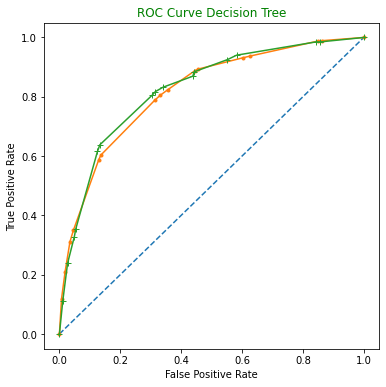

In [105]:
plt.figure(figsize=(6,6))
plt.plot([0,1], [0,1], linestyle = '--')
plt.plot(fpr_dtc_train, tpr_dtc_train, marker = '.');
plt.plot(fpr_dtc_test, tpr_dtc_test, marker = '+');
plt.title('ROC Curve Decision Tree', color = 'green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [106]:
# ----------------Random Forest--------------------
rfc = RandomForestClassifier(random_state = 123)

In [107]:
grid_array_rfc = {'max_depth': [3,4,5],
             'max_features': [5,6,7],
             'min_samples_leaf': [25,30,35],
             'min_samples_split': [90,100,110],
             'n_estimators': [300,400,500]}

In [108]:
grid_search_rfc = GridSearchCV(estimator = rfc, param_grid = grid_array_rfc, cv = 3)

In [109]:
grid_search_rfc.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             param_grid={'max_depth': [3, 4, 5], 'max_features': [5, 6, 7],
                         'min_samples_leaf': [25, 30, 35],
                         'min_samples_split': [90, 100, 110],
                         'n_estimators': [300, 400, 500]})

In [110]:
grid_search_rfc.best_params_

{'max_depth': 5,
 'max_features': 7,
 'min_samples_leaf': 30,
 'min_samples_split': 90,
 'n_estimators': 400}

In [111]:
rfc_gs = grid_search_rfc.best_estimator_
rfc_gs

RandomForestClassifier(max_depth=5, max_features=7, min_samples_leaf=30,
                       min_samples_split=90, n_estimators=400,
                       random_state=123)

In [112]:
prediction_rfc_gs_train = rfc_gs.predict(x_train)
prediction_rfc_gs_test = rfc_gs.predict(x_test)

Accuracy for RandomForestClassifier model for train data is: 0.7914285714285715


Classification report for RandomForestClassifier model for train data is: 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1444
           1       0.71      0.56      0.63       656

    accuracy                           0.79      2100
   macro avg       0.76      0.73      0.74      2100
weighted avg       0.78      0.79      0.78      2100



Confusion Matrix for RandomForestClassifier model for train data is:


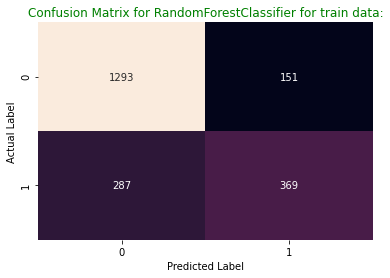

In [113]:
models_names={dtc:'DecisionTreeClassifier', rfc_gs:'RandomForestClassifier'}

print('Accuracy for {} model for train data is:'.format(models_names[rfc_gs]),rfc_gs.score(x_train,y_train))
print('\n')
print('Classification report for {} model for train data is:'.format(models_names[rfc_gs]),'\n',classification_report(y_train,prediction_rfc_gs_train))
print('\n')
print('Confusion Matrix for {} model for train data is:'.format(models_names[rfc_gs]))
sns.heatmap(confusion_matrix(y_train,prediction_rfc_gs_train),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {} for train data:'.format(models_names[rfc_gs]), color = 'green')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Accuracy for RandomForestClassifier model for test data is: 0.7922222222222223


Classification report for RandomForestClassifier model for test data is: 
               precision    recall  f1-score   support

           0       0.83      0.88      0.86       632
           1       0.68      0.58      0.63       268

    accuracy                           0.79       900
   macro avg       0.75      0.73      0.74       900
weighted avg       0.79      0.79      0.79       900



Confusion Matrix for RandomForestClassifier model for test data is:


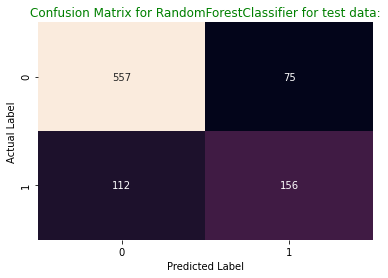

In [114]:
models_names={dtc:'DecisionTreeClassifier', rfc_gs:'RandomForestClassifier'}

print('Accuracy for {} model for test data is:'.format(models_names[rfc_gs]),rfc_gs.score(x_test,y_test))
print('\n')
print('Classification report for {} model for test data is:'.format(models_names[rfc_gs]),'\n',classification_report(y_test,prediction_rfc_gs_test))
print('\n')
print('Confusion Matrix for {} model for test data is:'.format(models_names[rfc_gs]))
sns.heatmap(confusion_matrix(y_test,prediction_rfc_gs_test),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {} for test data:'.format(models_names[rfc_gs]), color = 'green')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [115]:
pd.DataFrame(rfc_gs.feature_importances_, columns = ['Imp_rfc'], index = x_train.columns).sort_values('Imp_rfc', ascending ='True')

,Imp_rfc
Channel,0.000000
Destination,0.004409
Type,0.010575
Age,0.032082
Commision,0.044188
Duration,0.052916
Product Name,0.198411
Sales,0.202642
Agency_Code,0.454777


In [116]:
prob_rfc_gs_train = rfc_gs.predict_proba(x_train)[:,1]
prob_rfc_gs_test = rfc_gs.predict_proba(x_test)[:,1]

In [117]:
auc_rfc_gs_train = roc_auc_score(y_train,prob_rfc_gs_train)
auc_rfc_gs_test = roc_auc_score(y_test,prob_rfc_gs_test)
print('AUC Score for train data is:',round(auc_rfc_gs_train,2))
print('AUC Score for test data is :',round(auc_rfc_gs_test,2))

AUC Score for train data is: 0.84
AUC Score for test data is : 0.83


In [118]:
fpr_rfc_gs_train, tpr_rfc_gs_train, thresholds_rfc_gs_train = roc_curve(y_train,prob_rfc_gs_train)
fpr_rfc_gs_test, tpr_rfc_gs_test, thresholds_rfc_gs_test = roc_curve(y_test,prob_rfc_gs_test)

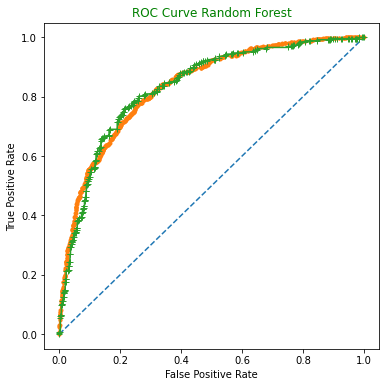

In [119]:
plt.figure(figsize=(6,6))
plt.plot([0,1], [0,1], linestyle = '--')
plt.plot(fpr_rfc_gs_train, tpr_rfc_gs_train, marker = '.');
plt.plot(fpr_rfc_gs_test, tpr_rfc_gs_test, marker = '+');
plt.title('ROC Curve Random Forest', color = 'green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [120]:
# ----------------ANN--------------------
mlp = MLPClassifier(random_state = 123)

In [121]:
sc1 = StandardScaler()

In [122]:
x_train_sc = sc1.fit_transform(x_train)
x_test_sc = sc1.transform(x_test)

In [123]:
grid_array_mlp = {'hidden_layer_sizes' : [100,200,300], 
                  'max_iter' : [100,200,300], 
                  'solver' : ['sgd', 'adam'], 
                  'tol' : [0.01,0.001],}

In [124]:
grid_search_mlp = GridSearchCV(estimator = mlp, param_grid = grid_array_mlp, cv = 3)

In [125]:
grid_search_mlp.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=123),
             param_grid={'hidden_layer_sizes': [100, 200, 300],
                         'max_iter': [100, 200, 300], 'solver': ['sgd', 'adam'],
                         'tol': [0.01, 0.001]})

In [126]:
grid_search_mlp.best_params_

{'hidden_layer_sizes': 300, 'max_iter': 100, 'solver': 'adam', 'tol': 0.001}

In [127]:
mlp_gs = grid_search_mlp.best_estimator_
mlp_gs

MLPClassifier(hidden_layer_sizes=300, max_iter=100, random_state=123, tol=0.001)

In [128]:
prediction_mlp_train = mlp_gs.predict(x_train_sc)
prediction_mlp_test = mlp_gs.predict(x_test_sc)

Accuracy for ANN model for train data is: 0.7452380952380953


Classification report for ANN model for train data is: 
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1444
           1       0.59      0.60      0.60       656

    accuracy                           0.75      2100
   macro avg       0.70      0.71      0.71      2100
weighted avg       0.75      0.75      0.75      2100



Confusion Matrix for ANN model for train data is:


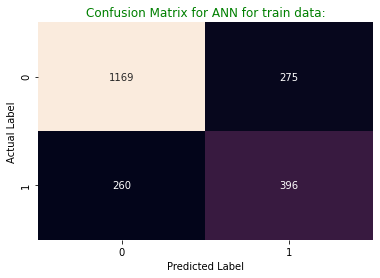

In [129]:
models_names={dtc:'DecisionTreeClassifier', rfc_gs:'RandomForestClassifier', mlp_gs:'ANN' }

print('Accuracy for {} model for train data is:'.format(models_names[mlp_gs]),mlp_gs.score(x_train_sc,y_train))
print('\n')
print('Classification report for {} model for train data is:'.format(models_names[mlp_gs]),'\n',classification_report(y_train,prediction_mlp_train))
print('\n')
print('Confusion Matrix for {} model for train data is:'.format(models_names[mlp_gs]))
sns.heatmap(confusion_matrix(y_train,prediction_mlp_train),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {} for train data:'.format(models_names[mlp_gs]), color = 'green')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Accuracy for ANN model for test data is: 0.7655555555555555


Classification report for ANN model for test data is: 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       632
           1       0.60      0.64      0.62       268

    accuracy                           0.77       900
   macro avg       0.72      0.73      0.73       900
weighted avg       0.77      0.77      0.77       900



Confusion Matrix for ANN model for test data is:


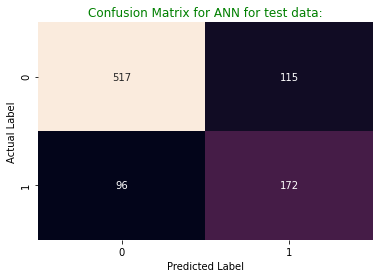

In [130]:
models_names={dtc:'DecisionTreeClassifier', rfc_gs:'RandomForestClassifier', mlp_gs:'ANN' }

print('Accuracy for {} model for test data is:'.format(models_names[mlp_gs]),mlp_gs.score(x_test_sc,y_test))
print('\n')
print('Classification report for {} model for test data is:'.format(models_names[mlp_gs]),'\n',classification_report(y_test,prediction_mlp_test))
print('\n')
print('Confusion Matrix for {} model for test data is:'.format(models_names[mlp_gs]))
sns.heatmap(confusion_matrix(y_test,prediction_mlp_test),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {} for test data:'.format(models_names[mlp_gs]), color = 'green')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [131]:
prob_mlp_train = mlp_gs.predict_proba(x_train_sc)[:,1]
prob_mlp_test = mlp_gs.predict_proba(x_test_sc)[:,1]

In [132]:
auc_mlp_train = roc_auc_score(y_train,prob_mlp_train)
auc_mlp_test = roc_auc_score(y_test,prob_mlp_test)
print('AUC Score for train data is:',round(auc_mlp_train,2))
print('AUC Score for test data is :',round(auc_mlp_test,2))

AUC Score for train data is: 0.76
AUC Score for test data is : 0.79


In [133]:
fpr_mlp_train, tpr_mlp_train, thresholds_mlp_train = roc_curve(y_train,prob_mlp_train)
fpr_mlp_test, tpr_mlp_test, thresholds_mlp_test = roc_curve(y_test,prob_mlp_test)

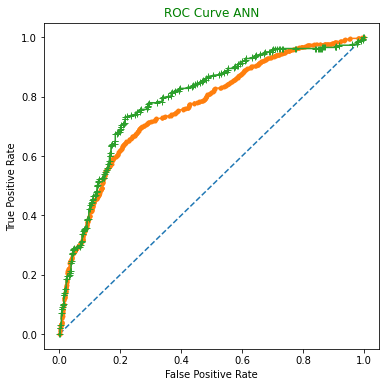

In [134]:
plt.figure(figsize=(6,6))
plt.plot([0,1], [0,1], linestyle = '--')
plt.plot(fpr_mlp_train, tpr_mlp_train, marker = '.');
plt.plot(fpr_mlp_test, tpr_mlp_test, marker = '+');
plt.title('ROC Curve ANN', color = 'green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Area under the curve for Decision Tree Classification Model is 0.83
Area under the curve for Random Forest Classification Model is 0.83
Area under the curve for Artificial Neural Network Model is 0.79


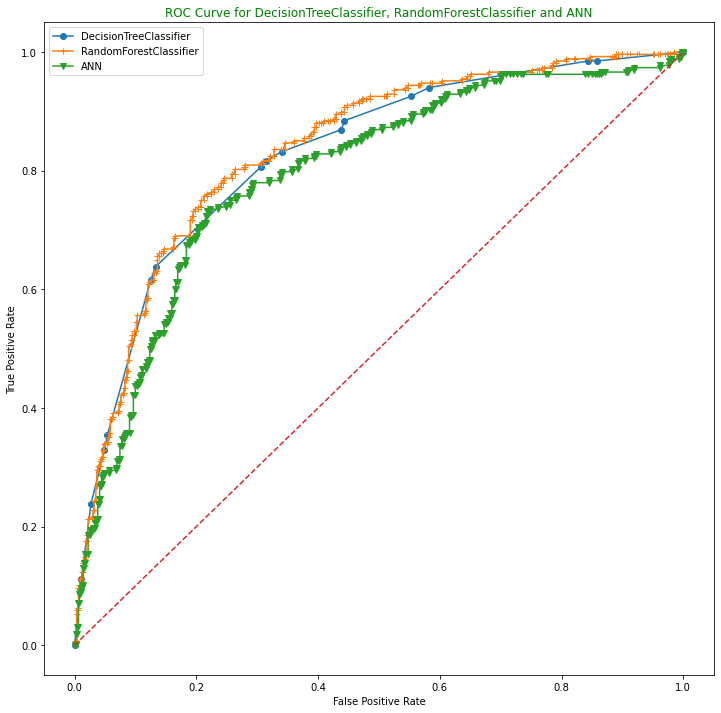

In [135]:
# Compare ROC curves and Calculate Area under the curve for all models

print('Area under the curve for Decision Tree Classification Model is', round(auc_dtc_test,2))
print('Area under the curve for Random Forest Classification Model is', round(auc_rfc_gs_test,2))
print('Area under the curve for Artificial Neural Network Model is', round(auc_mlp_test,2))

plt.figure(figsize=(12,12))
plt.plot(fpr_dtc_test, tpr_dtc_test, marker = 'o')

plt.plot(fpr_rfc_gs_test, tpr_rfc_gs_test, marker = '+'); 

plt.plot(fpr_mlp_test, tpr_mlp_test, marker = 'v'); 
plt.plot([0, 1], [0, 1], linestyle = '--')

plt.title('ROC Curve for {}'.format('DecisionTreeClassifier, RandomForestClassifier and ANN'), color ='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(models_names.values())
plt.show()

In [186]:
# END